In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
sns.set_style("whitegrid")

In [2]:
data = pd.read_csv("../Output/SU3_24_24_24_48_6.2000_1000_PHB_4_OR_7_dp.csv")

In [3]:
data.head()

,R,T,Re,Im
0,0,0,1.0,0.000000e+00
1,0,1,1.0,0.000000e+00
2,0,2,1.0,5.232560e-21
3,0,3,1.0,-7.699850e-20
4,0,4,1.0,3.111580e-21


In [4]:
data = data[(data.R > 0) & (data['T'] > 0)]

In [5]:
def exponenial_func(x, a, b, c):
    return a*np.exp(-b*x)+c

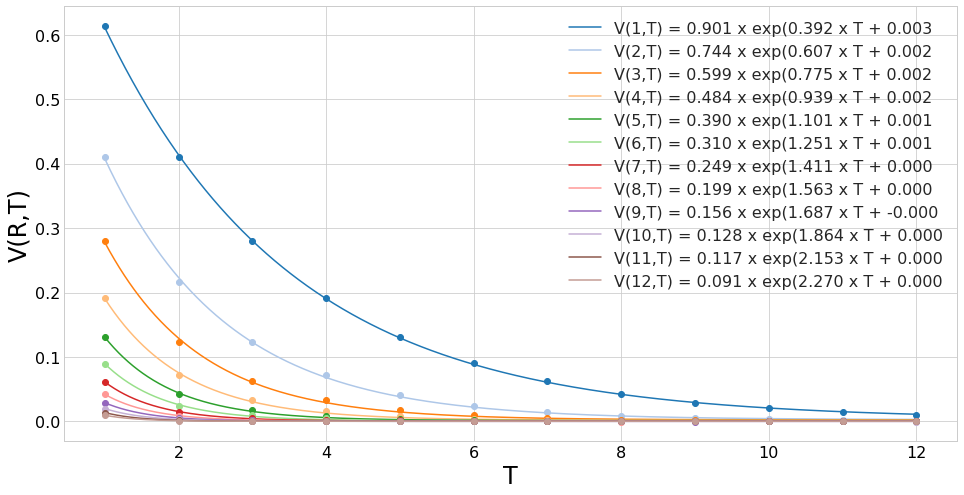

In [6]:
with sns.color_palette('tab20', len(set(data.loc[data.R > 0, 'R']))):
    fig = plt.figure(figsize=(16,8))
    for i, r in enumerate(list(set(data.loc[data.R > 0, 'R']))):
        x = data.loc[data.R == r, 'T']
        y = data.loc[data.R == r, 'Re']
        fit, conv = curve_fit(exponenial_func, x, y, p0=(0.5, 1, 0.001))
        xx = np.linspace(np.min(x), np.max(x), 1000)
        yy = exponenial_func(xx, *fit)
        plt.plot(x, y, 'o', color=sns.color_palette()[i], label='')
        plt.plot(xx, yy, color=sns.color_palette()[i], label='V({},T) = {:.3f} x exp({:.3f} x T + {:.3f}'.format(r, fit[0], fit[1], fit[2]))



    plt.legend(loc='best', fontsize=16)
    plt.xticks(fontsize=16, color='black')
    plt.yticks(fontsize=16, color='black')
    plt.ylabel("V(R,T)", fontsize=24, color='black')
    plt.xlabel('T', fontsize=24, color='black')
    plt.show()

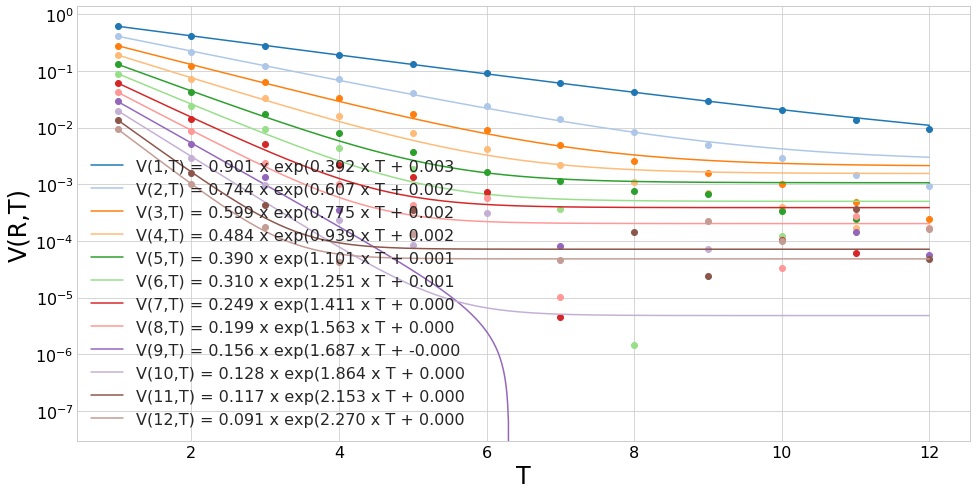

In [7]:
with sns.color_palette('tab20', len(set(data.loc[data.R > 0, 'R']))):
    fig = plt.figure(figsize=(16,8))
    for i, r in enumerate(list(set(data.loc[data.R > 0, 'R']))):
        x = data.loc[data.R == r, 'T']
        y = data.loc[data.R == r, 'Re']
        fit, conv = curve_fit(exponenial_func, x, y, p0=(0.5, 1, 0.001))
        xx = np.linspace(np.min(x), np.max(x), 1000)
        yy = exponenial_func(xx, *fit)
        plt.plot(x, y, 'o', color=sns.color_palette()[i], label='')
        plt.plot(xx, yy, color=sns.color_palette()[i], label='V({},T) = {:.3f} x exp({:.3f} x T + {:.3f}'.format(r, fit[0], fit[1], fit[2]))



    plt.legend(loc='best', fontsize=16)
    plt.yscale('log')
    plt.xticks(fontsize=16, color='black')
    plt.yticks(fontsize=16, color='black')
    plt.ylabel("V(R,T)", fontsize=24, color='black')
    plt.xlabel('T', fontsize=24, color='black')
    plt.show()